In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize                                                            # Necessary Functions
def sigmoid(inputs):
  output = 1 / (1 + np.exp(-inputs))
  return output

def sigmoid1(inputs):
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)
  return temp2

def sigmoid2(inputs):
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-2*temp1)
  return temp2

def sigmoid3(inputs):
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-(6*temp1)+6*(temp1**2))
  return temp2

def sigmoid4(x):
    s = sigmoid(x)
    return s * (1 - s) * (-6 + 36 * s - 84 * s ** 2 + 72 * s ** 3)

def sigmoid5(x):
    s = sigmoid(x)
    return s * (1 - s) * (36 - 360 * s + 1512 * s ** 2 - 3024 * s ** 3 + 2592 * s ** 4)


# def sigmoid3(inputs):
#   temp1 =  sigmoid(inputs)
#   temp2 =  sigmoid1(inputs)
#   temp3 = temp2*(1-temp1)*(1-2*temp1) - temp1*temp2*(1-2*temp1) - 2*temp2*temp1*(1-temp1)
#   return temp3



def sigmoid_for_k(input,k):
  if k ==0:
    return sigmoid(input)
  elif k == 1:
    return sigmoid1(input)
  elif k ==2:
    return sigmoid2(input)
  elif k == 3:
    return sigmoid3(input)
  elif k == 4:
    return sigmoid4(input)
  elif k == 5:
    return sigmoid5(input)

def func6(inputs):
  X = inputs.T
  x = X[:,0]
  y = X[:,1]

  temp1 =  2 - (y**2)*(np.pi**2) + 2*(y**3)*np.sin(np.pi * x)
  temp2 = np.sin(np.pi * x)
  temp3 = temp1*temp2
  temp3 = temp3.reshape(len(x),1)
  return temp3




                                                                                # Intial Value Intialisation
def get_grid(grid_len,a=0,b=1):
  nx, ny = (grid_len, grid_len)
  x = np.linspace(a, b, nx)
  y = np.linspace(a, b, ny)
  grid = [(i,j) for i in x for j in y]
  return [np.array(grid).T,[x,y]]








def layer1NN(p,inputs):                                                         # Neural Network with 1 hidden unit
  # inputs.resize((len(inputs),1))
  weights = p[0:2*(len(p)//4)].reshape(2,len(p)//4)
  biases = p[2*(len(p)//4):3*(len(p)//4)].reshape(1,len(p)//4)
  nweights = p[3*(len(p)//4):4*(len(p)//4)].reshape(1,len(p)//4)


  lin_out = weights.T @ inputs + biases.T
  # lin_out = weights @ inputs + biases                                         # output shape(n_neurons, input_size )
  nor_out = sigmoid(lin_out)
  net_out = nweights @ nor_out                                                  # output shape(1, input_size )
  # net_out = net_out.T
  # print(nweights.shape,nor_out.shape)
  return lin_out, net_out








def der_NN_xj_k(inputs, weights, nweights, biases,X, j,k=0):                    # This calculates D^k_N/D^k_x when j =0, and D^k_N/D^k_y when j=1
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j



  temp1 = weights[j]**k
  temp2 = nweights * temp1                                                      # (1,n_neurons)
  lin_out = weights.T @ inputs + biases.T
  # lin_out = weights @ inputs + biases
  temp3 = sigmoid_for_k(lin_out,k)
  temp4 = temp2 @ temp3
  # print(temp4.shape)
  return temp4.T                                                               # return (n,1) shape array

def der_NN_xy_k(inputs, weights, nweights, biases,X, j,k):
  # temp1 =1
  # for i in range(len(j)):
  #   temp1 = temp1*(weights[j[i]]**k[i])

  temp1 = (weights[0]**k[0])*(weights[1]**k[1])

  temp2 = nweights * temp1
  lin_out = weights.T @ inputs + biases.T
  # lin_out = weights @ inputs + biases
  temp3 = sigmoid_for_k(lin_out,sum(k))
  # print(temp2.shape, temp3.shape)
  temp4 = temp2 @ temp3
  return temp4.T

def der_NN_xj_k_for_v(inputs, weights, nweights, biases,X, j,k=0):
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j
  lin_out = weights.T @ inputs + biases.T
  temp1 = ((weights[j]**k) * (sigmoid_for_k(lin_out,k).T) )
  return temp1                                                                  # return (n,n_neurons) shape array

def der_NN_xy_k_for_v(inputs, weights, nweights, biases,X, j,k):
  # temp1 =1
  # for i in range(len(j)):
  #   temp1 = temp1*(weights[j[i]]**k[i])

  temp1 = (weights[0]**k[0])*(weights[1]**k[1])
  lin_out = weights.T @ inputs + biases.T
  temp3 = sigmoid_for_k(lin_out,sum(k))
  temp4 = temp1 * temp3.T

  return temp4

def der_NN_xj_k_for_u(inputs, weights, nweights, biases,X, j,k=0):
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j
  lin_out = weights.T @ inputs + biases.T
  temp1 = weights[j]**k
  temp2 = nweights * temp1
  temp3 = (sigmoid_for_k(lin_out,k+1).T * temp2)
  # print(sigmoid_for_k(lin_out,k+1).shape,temp2.shape)
  return temp3                                                                  # return (n,n_neurons) shape array


def der_NN_xy_k_for_u(inputs, weights, nweights, biases,X, j,k):
  # temp1 =1
  # for i in range(len(j)):
  #   temp1 = temp1*(weights[j[i]]**k[i])

  temp1 = (weights[0]**k[0])*(weights[1]**k[1])

  temp2 = nweights * temp1
  lin_out = weights.T @ inputs + biases.T
  temp3 = sigmoid_for_k(lin_out,sum(k)+1)
  # print(temp3.shape,temp2.shape)
  temp4 = temp3.T * temp2

  return temp4



def der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j,k=0,l=0):              # This calculates D_Ng/D_w
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j

  X = inputs.T
  x = X[:,0]
  # x = x.reshape(len(x),1)
  y = X[:,1]
  # y = y.reshape(len(y),1)

  lin_out = weights.T @ inputs + biases.T


  temp1 = ((nweights*(weights[j]**k)) * (sigmoid_for_k(lin_out,k+1).T) )
  if l ==0:
    temp2 = x
  else:
    temp2 = y

  temp3 = temp2 * (temp1.T)
  temp3 = temp3.T

  if k >0:
    temp4 = k*((nweights*(weights[j]**(k-1))) * (sigmoid_for_k(lin_out,k).T) )
    return temp3 + temp4

  return temp3                                                               # return (n, n_neurons) shape array


def der_NN_xy_k_for_w(inputs, weights, nweights, biases,X, j,k,l):
  # temp1 =1
  # for i in range(len(j)):
  #   temp1 = temp1*(weights[j[i]]**k[i])
  X = inputs.T
  x = X[:,0]
  # x = x.reshape(len(x),1)
  y = X[:,1]
  # y = y.reshape(len(y),1)

  temp1 = (weights[0]**k[0])*(weights[1]**k[1])
  lin_out = weights.T @ inputs + biases.T

  temp2 = ((nweights*temp1) * (sigmoid_for_k(lin_out,sum(k)+1).T) )
  if l ==0:
    temp3 = x
  else:
    temp3 = y

  temp4 = temp3 * (temp2.T)
  temp4 = temp4.T



  # if sum(k) >0:
  #   temp5 = k[0]*((nweights*(weights[j]**(k[j]-1))) * (sigmoid_for_k(lin_out,sum(k)).T) )
  #   return temp4 + temp5

  return temp4



def D2_B_wrt_x1(inputs):
  X = inputs.T
  x = X[:,0]
  y = X[:,1]                                                                    #  D^2 B/Dx^2
  temp1 = -2*(np.pi**2)*y
  temp2 = np.sin(np.pi*x)
  temp3 = temp1 * temp2
  temp3 = temp3.reshape(len(x),1)
  return temp3

def D2_B_wrt_x2(inputs):
  # X = inputs.T
  # x = X[:,0]
  # y = X[:,1]                                                                  # D^2 B/Dy^2
  # temp1 = 6*(1- x)*y
  # temp2 = (6*np.exp(-1))*(x)*y
  # temp3 = temp1 + temp2
  # temp3 = temp3.reshape(len(x),1)
  return 0

def D2_F_wrt_x1(inputs, weights, nweights, biases):                           # D^2 F/Dx^2
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)


  x1 = np.zeros(X.shape)
  x1[:,0] = x.T
  x1[:,1] = np.ones((1,len(y)))

  inputs1 = x1.T


  # Phi = B(x,y) + F(x,y,N)
  N_0 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=0,k=0)
  N_0_y1 = der_NN_xj_k(inputs1, weights, nweights, biases,X,j=0,k=0)
  N_1_y1 = der_NN_xj_k(inputs1, weights, nweights, biases,X,j=1,k=1)




  N_1 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=0,k=1)
  N_1_y1 = der_NN_xj_k(inputs1, weights, nweights, biases,X,j=0,k=1)
  N_2_y1 = der_NN_xy_k(inputs1, weights, nweights, biases,X,j=[0,1],k=[1,1])



  N_2 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=0,k=2)
  N_2_y1 = der_NN_xj_k(inputs1, weights, nweights, biases,X,j=0,k=2)
  N_3_y1 = der_NN_xy_k(inputs1, weights, nweights, biases,X,j=[0,1],k=[2,1])

  temp1 = -2* (N_0  - N_0_y1  - N_1_y1)
  temp2 = (2-4*x)*(N_1 - N_1_y1  - N_2_y1)
  temp3 = (x- x**2)*(N_2 - N_2_y1  - N_3_y1)
  temp4 = (y)*(temp1 + temp2 + temp3)                                       # return (n,n_neurons) shape array

  # print(temp1.shape,temp2.shape,temp3.shape,temp4.shape)
  return temp4

def D2_F_wrt_x2(inputs, weights, nweights, biases):                           # D^2 F/Dy^2

  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  # Phi = B(x,y) + F(x,y,N)
  N_0 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=1,k=0)
  N_1 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=1,k=1)
  N_2 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=1,k=2)
  temp1 = 2*N_1
  temp2 = y*N_2
  temp3 = N_0
  # temp3 = (y- y**2)*N_2
  temp4 = (x-x**2)*(temp1 + temp2 + temp3)
  return temp4                                                                  # return (n,n_neurons) shape array



def D1_F_wrt_x2(inputs, weights, nweights, biases):
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  x1 = np.zeros(X.shape)
  x1[:,0] = x.T
  x1[:,1] = np.ones((1,len(y)))
  inputs1 = x1.T

  lin_out = weights.T @ inputs + biases.T
  nor_out = sigmoid(lin_out)
  N = nweights @ nor_out

  lin_out1 = weights.T @ inputs1 + biases.T
  nor_out1 = sigmoid(lin_out1)
  N1 = nweights @ nor_out1

  N_dy = der_NN_xj_k(inputs, weights, nweights, biases,X, j=1,k=1)
  N_dy1 = der_NN_xj_k(inputs1, weights, nweights, biases,X, j=1,k=1)

  temp1 = (N.T - N1.T - N_dy1)
  temp2 = y*(N_dy)

  return x*(1-x)*(temp1 + temp2)



In [ ]:
def error_for_trans_wrt_u(inputs,cap_N , Dx_cap_N, D2x_cap_N, Du_cap_N, Du_Dx_cap_N, Du_D2x_cap_N, Dy_N, N_1_y_u, N_2_y_u):    # This calculates D(Error)/DU
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  a = -2*y*(np.pi**2)*np.sin(np.pi*x)
  b = 2*y*np.sin(np.pi*x)
  c = 2*np.sin(np.pi*x)

  A = -2*y + b*x*(1-x) +c*x*(1-x)*y
  B = y*(x*(1-x))**2
  C = 2*(1-2*x)*y
  D = x*(1-x)*y
  E = x*(1-x)
  F = b*(x-x**2)*y
  G = (x*(1-x)*y)**2
  H = a+ b*c


  temp1 = A* Du_cap_N
  temp2 = 2*B* (cap_N * Du_cap_N)
  temp3 = C* Du_Dx_cap_N
  temp4 = D* Du_D2x_cap_N
  temp5 = E* (2*N_1_y_u + y*N_2_y_u )
  temp6 = F* N_1_y_u
  temp7 = G* (Du_cap_N* Dy_N  + cap_N*N_1_y_u)

  return temp1 + temp2 + temp3 + temp4 + temp5 + temp6 + temp7


def error_for_trans_wrt_v(inputs,cap_N , Dx_cap_N, D2x_cap_N, Dv_cap_N, Dv_Dx_cap_N, Dv_D2x_cap_N, Dy_N, N_1_y_v, N_2_y_v):    # This calculates D(Error)/DV
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  a = -2*y*(np.pi**2)*np.sin(np.pi*x)
  b = 2*y*np.sin(np.pi*x)
  c = 2*np.sin(np.pi*x)

  A = -2*y + b*x*(1-x) +c*x*(1-x)*y
  B = y*(x*(1-x))**2
  C = 2*(1-2*x)*y
  D = x*(1-x)*y
  E = x*(1-x)
  F = b*(x-x**2)*y
  G = (x*(1-x)*y)**2
  H = a+ b*c


  temp1 = A* Dv_cap_N
  temp2 = 2*B* (cap_N * Dv_cap_N)
  temp3 = C* Dv_Dx_cap_N
  temp4 = D* Dv_D2x_cap_N
  temp5 = E* (2*N_1_y_v + y*N_2_y_v )
  temp6 = F* N_1_y_v
  temp7 = G* (Dv_cap_N* Dy_N  + cap_N*N_1_y_v)

  return temp1 + temp2 + temp3 + temp4 + temp5 + temp6 + temp7



def error_for_trans_wrt_w0(inputs,cap_N , Dx_cap_N, D2x_cap_N, Dw0_cap_N, Dw0_Dx_cap_N, Dw0_D2x_cap_N, Dy_N, N_1_y_w0, N_2_y_w0):    # This calculates D(Error)/Dw0
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)


  a = -2*y*(np.pi**2)*np.sin(np.pi*x)
  b = 2*y*np.sin(np.pi*x)
  c = 2*np.sin(np.pi*x)

  A = -2*y + b*x*(1-x) +c*x*(1-x)*y
  B = y*(x*(1-x))**2
  C = 2*(1-2*x)*y
  D = x*(1-x)*y
  E = x*(1-x)
  F = b*(x-x**2)*y
  G = (x*(1-x)*y)**2
  H = a+ b*c


  temp1 = A* Dw0_cap_N
  temp2 = 2*B* (cap_N * Dw0_cap_N)
  temp3 = C* Dw0_Dx_cap_N
  temp4 = D* Dw0_D2x_cap_N
  temp5 = E* (2*N_1_y_w0 + y*N_2_y_w0 )
  temp6 = F* N_1_y_w0
  temp7 = G* (Dw0_cap_N* Dy_N  + cap_N*N_1_y_w0)

  return temp1 + temp2 + temp3 + temp4 + temp5 + temp6 + temp7


def error_for_trans_wrt_w1(inputs,cap_N , Dx_cap_N, D2x_cap_N, Dw1_cap_N, Dw1_Dx_cap_N, Dw1_D2x_cap_N, Dy_N, N_1_y_w1, N_2_y_w1):    # This calculates D(Error)/Dw1
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  a = -2*y*(np.pi**2)*np.sin(np.pi*x)
  b = 2*y*np.sin(np.pi*x)
  c = 2*np.sin(np.pi*x)

  A = -2*y + b*x*(1-x) +c*x*(1-x)*y
  B = y*(x*(1-x))**2
  C = 2*(1-2*x)*y
  D = x*(1-x)*y
  E = x*(1-x)
  F = b*(x-x**2)*y
  G = (x*(1-x)*y)**2
  H = a+ b*c


  temp1 = A* Dw1_cap_N
  temp2 = 2*B* (cap_N * Dw1_cap_N)
  temp3 = C* Dw1_Dx_cap_N
  temp4 = D* Dw1_D2x_cap_N
  temp5 = E* (2*N_1_y_w1 + y*N_2_y_w1 )
  temp6 = F* N_1_y_w1
  temp7 = G* (Dw1_cap_N* Dy_N  + cap_N*N_1_y_w1)

  return temp1 + temp2 + temp3 + temp4 + temp5 + temp6 + temp7

In [ ]:
def err7(inputs, weights, nweights, biases, cap_N, Dx_cap_N, D2x_cap_N, Dy_N, D2y_N ):
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  x1 = np.zeros(X.shape)
  x1[:,0] = x.T
  x1[:,1] = np.ones((1,len(y)))
  inputs1 = x1.T

  a = -2*y*(np.pi**2)*np.sin(np.pi*x)
  b = 2*y*np.sin(np.pi*x)
  c = 2*np.sin(np.pi*x)

  A = -2*y + b*x*(1-x) +c*x*(1-x)*y
  B = y*(x*(1-x))**2
  C = 2*(1-2*x)*y
  D = x*(1-x)*y
  E = x*(1-x)
  F = b*(x-x**2)*y
  G = (x*(1-x)*y)**2
  H = a+ b*c

  temp1 = A* cap_N
  temp2 = B* (cap_N)**2
  temp3 = C* Dx_cap_N
  temp4 = D* D2x_cap_N
  temp5 = E* (2*Dy_N + y*D2y_N)
  temp6 = F* Dy_N
  temp7 = G* (Dy_N)*cap_N
  temp8 = H
  I = np.sin(np.pi*x)*(2-(np.pi**2)*(y**2) + 2*(y**3)*np.sin(np.pi*x))

  return temp1 + temp2 + temp3 + temp4 + temp5 + temp6 + temp7 + temp8 -I

def calc_grad(p,inputs):
  # This Estimates the Following
  # D(Squared Error)/DV = 2* ( Error.T @ D(Error)/DV)
  # D(Squared Error)/DU = 2* ( Error.T @ D(Error)/DU)
  # D(Squared Error)/DW = 2* ( Error.T @ D(Error)/DW)


  weights = p[0:2*(len(p)//4)].reshape(2,len(p)//4)
  biases = p[2*(len(p)//4):3*(len(p)//4)].reshape(1,len(p)//4)
  nweights = p[3*(len(p)//4):4*(len(p)//4)].reshape(1,len(p)//4)

  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  x1 = np.zeros(X.shape)
  x1[:,0] = x.T
  x1[:,1] = np.ones((1,len(y)))
  inputs1 = x1.T



  lin_out = weights.T @ inputs + biases.T
  nor_out = sigmoid(lin_out)
  N = nweights @ nor_out

  lin_out1 = weights.T @ inputs1 + biases.T
  nor_out1 = sigmoid(lin_out1)
  N1 = nweights @ nor_out1

  Dy_N1    = der_NN_xj_k(inputs1, weights, nweights, biases,X, j=1,k=1)
  Dy_N     = der_NN_xj_k(inputs, weights, nweights, biases,X, j=1,k=1)
  D2y_N     = der_NN_xj_k(inputs, weights, nweights, biases,X, j=1,k=2)
  Dx_N     = der_NN_xj_k(inputs, weights, nweights, biases,X, j=0,k=1)
  Dx_N1    = der_NN_xj_k(inputs1, weights, nweights, biases,X, j=0,k=1)
  Dx_Dy_N1 = der_NN_xy_k(inputs1, weights, nweights, biases,X, j=[0,1],k=[1,1])
  D2x_N    = der_NN_xj_k(inputs, weights, nweights, biases,X, j=0,k=2)
  D2x_N1   = der_NN_xj_k(inputs1, weights, nweights, biases,X, j=0,k=2)
  D2x_dy_N1= der_NN_xy_k(inputs1, weights, nweights, biases,X, j=[0,1],k=[2,1])


  N_0_u    = der_NN_xj_k_for_u(inputs, weights, nweights, biases,X, j=0,k=0)
  N1_0_u   = der_NN_xj_k_for_u(inputs1, weights, nweights, biases,X, j=0,k=0)
  N1_1_y_u = der_NN_xj_k_for_u(inputs1, weights, nweights, biases,X, j=1,k=1)
  N_1_y_u  = der_NN_xj_k_for_u(inputs, weights, nweights, biases,X, j=1,k=1)
  N_2_y_u  = der_NN_xj_k_for_u(inputs, weights, nweights, biases,X, j=1,k=2)
  N_1_x_u  = der_NN_xj_k_for_u(inputs, weights, nweights, biases,X, j=0,k=1)
  N1_1_x_u = der_NN_xj_k_for_u(inputs1, weights, nweights, biases,X, j=0,k=1)
  N_2_x_u  = der_NN_xj_k_for_u(inputs, weights, nweights, biases,X, j=0,k=2)
  N1_2_x_u = der_NN_xj_k_for_u(inputs1, weights, nweights, biases,X, j=0,k=2)
  N1_2_xy_u= der_NN_xy_k_for_u(inputs1, weights, nweights, biases,X, j=[0,1],k=[1,1])
  N1_3_xy_u= der_NN_xy_k_for_u(inputs1, weights, nweights, biases,X, j=[0,1],k=[2,1])

  N_0_v    = der_NN_xj_k_for_v(inputs, weights, nweights, biases,X, j=0,k=0)
  N1_0_v   = der_NN_xj_k_for_v(inputs1, weights, nweights, biases,X, j=0,k=0)
  N1_1_y_v = der_NN_xj_k_for_v(inputs1, weights, nweights, biases,X, j=1,k=1)
  N_1_y_v  = der_NN_xj_k_for_v(inputs, weights, nweights, biases,X, j=1,k=1)
  N_2_y_v  = der_NN_xj_k_for_v(inputs, weights, nweights, biases,X, j=1,k=2)
  N_1_x_v  = der_NN_xj_k_for_v(inputs, weights, nweights, biases,X, j=0,k=1)
  N1_1_x_v = der_NN_xj_k_for_v(inputs1, weights, nweights, biases,X, j=0,k=1)
  N_2_x_v  = der_NN_xj_k_for_v(inputs, weights, nweights, biases,X, j=0,k=2)
  N1_2_x_v = der_NN_xj_k_for_v(inputs1, weights, nweights, biases,X, j=0,k=2)
  N1_2_xy_v= der_NN_xy_k_for_v(inputs1, weights, nweights, biases,X, j=[0,1],k=[1,1])
  N1_3_xy_v= der_NN_xy_k_for_v(inputs1, weights, nweights, biases,X, j=[0,1],k=[2,1])

  N_0_w0    = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=0, l=0)
  N1_0_w0   = der_NN_xj_k_for_w(inputs1, weights, nweights, biases,X, j=0,k=0, l=0)
  N1_1_y_w0 = der_NN_xj_k_for_w(inputs1, weights, nweights, biases,X, j=0,k=1, l=0)
  N_1_y_w0  = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=1, l=0)
  N_2_y_w0  = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=2, l=0)
  N_1_x_w0  = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=1, l=0)
  N1_1_x_w0 = der_NN_xj_k_for_w(inputs1, weights, nweights, biases,X, j=0,k=1, l=0)
  N_2_x_w0  = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=2, l=0)
  N1_2_x_w0 = der_NN_xj_k_for_w(inputs1, weights, nweights, biases,X, j=0,k=2, l=0)
  N1_2_xy_w0= der_NN_xy_k_for_w(inputs1, weights, nweights, biases,X, j=[0,1],k=[1,1],l=0)
  N1_3_xy_w0= der_NN_xy_k_for_w(inputs1, weights, nweights, biases,X, j=[0,1],k=[2,1],l=0)

  N_0_w1    = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=0, l=1)
  N1_0_w1   = der_NN_xj_k_for_w(inputs1, weights, nweights, biases,X, j=0,k=0, l=1)
  N1_1_y_w1 = der_NN_xj_k_for_w(inputs1, weights, nweights, biases,X, j=0,k=1, l=1)
  N_1_y_w1  = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=1, l=1)
  N_2_y_w1  = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=2, l=1)
  N_1_x_w1  = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=1, l=1)
  N1_1_x_w1 = der_NN_xj_k_for_w(inputs1, weights, nweights, biases,X, j=0,k=1, l=1)
  N_2_x_w1  = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=2, l=1)
  N1_2_x_w1 = der_NN_xj_k_for_w(inputs1, weights, nweights, biases,X, j=0,k=2, l=1)
  N1_2_xy_w1= der_NN_xy_k_for_w(inputs1, weights, nweights, biases,X, j=[0,1],k=[1,1],l=1)
  N1_3_xy_w1= der_NN_xy_k_for_w(inputs1, weights, nweights, biases,X, j=[0,1],k=[2,1],l=1)


  cap_N        =  N.T - N1.T - Dy_N1
  Dx_cap_N     =  Dx_N - Dx_N1 - Dx_Dy_N1
  D2x_cap_N    =  D2x_N - D2x_N1 - D2x_dy_N1


  Du_cap_N     = N_0_u - N1_0_u - N1_1_y_u
  Du_Dx_cap_N     = N_1_x_u - N1_1_x_u - N1_2_xy_u
  Du_D2x_cap_N    = N_2_x_u - N1_2_x_u - N1_3_xy_u


  Dv_cap_N     = N_0_v - N1_0_v - N1_1_y_v
  Dv_Dx_cap_N     = N_1_x_v - N1_1_x_v - N1_2_xy_v
  Dv_D2x_cap_N    = N_2_x_v - N1_2_x_v - N1_3_xy_v


  Dw0_cap_N     = N_0_w0 - N1_0_w0 - N1_1_y_w0
  Dw0_Dx_cap_N     = N_1_x_w0 - N1_1_x_w0 - N1_2_xy_w0
  Dw0_D2x_cap_N    = N_2_x_w0 - N1_2_x_w0 - N1_3_xy_w0


  Dw1_cap_N     = N_0_w1 - N1_0_w1 - N1_1_y_w1
  Dw1_Dx_cap_N     = N_1_x_w1 - N1_1_x_w1 - N1_2_xy_w1
  Dw1_D2x_cap_N    = N_2_x_w1 - N1_2_x_w1 - N1_3_xy_w1


  err_for_trans_wrt_u = error_for_trans_wrt_u(inputs,cap_N , Dx_cap_N, D2x_cap_N, Du_cap_N, Du_Dx_cap_N, Du_D2x_cap_N, Dy_N, N_1_y_u, N_2_y_u)
  err_for_trans_wrt_v = error_for_trans_wrt_v(inputs,cap_N , Dx_cap_N, D2x_cap_N, Dv_cap_N, Dv_Dx_cap_N, Dv_D2x_cap_N, Dy_N, N_1_y_v, N_2_y_v)
  err_for_trans_wrt_w0 = error_for_trans_wrt_w0(inputs,cap_N , Dx_cap_N, D2x_cap_N, Dw0_cap_N, Dw0_Dx_cap_N, Dw0_D2x_cap_N, Dy_N, N_1_y_w0, N_2_y_w0)
  err_for_trans_wrt_w1 = error_for_trans_wrt_w1(inputs,cap_N , Dx_cap_N, D2x_cap_N, Dw1_cap_N, Dw1_Dx_cap_N, Dw1_D2x_cap_N, Dy_N, N_1_y_w1, N_2_y_w1)

  err = err7(inputs, weights, nweights, biases, cap_N, Dx_cap_N, D2x_cap_N, Dy_N, D2y_N )

  grad_v = err.T @ err_for_trans_wrt_v
  grad_u = err.T @ err_for_trans_wrt_u
  grad_w0 = err.T @ err_for_trans_wrt_w0
  grad_w1 = err.T @ err_for_trans_wrt_w1


  dp = np.array([grad_w0, grad_w1, grad_u,grad_v ])
  dp = dp.reshape(1,len(p))

  # print(err.shape)
  return dp[0]

In [ ]:
def error7_1(p,inputs):
  weights = p[0:2*(len(p)//4)].reshape(2,len(p)//4)
  biases = p[2*(len(p)//4):3*(len(p)//4)].reshape(1,len(p)//4)
  nweights = p[3*(len(p)//4):4*(len(p)//4)].reshape(1,len(p)//4)           # This calculates Error


  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)


  x1 = np.zeros(X.shape)
  x1[:,0] = x.T
  x1[:,1] = np.ones((1,len(y)))

  inputs1 = x1.T


  # Phi = B(x,y) + F(x,y,N)
  N_0 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=0,k=0)
  N_0_y1 = der_NN_xj_k(inputs1, weights, nweights, biases,X,j=0,k=0)
  N_1_y1 = der_NN_xj_k(inputs1, weights, nweights, biases,X,j=1,k=1)

  F_XY        = func6(inputs)
  d2_F_wrt_x1 = D2_F_wrt_x1(inputs, weights, nweights, biases)
  d2_F_wrt_x2 = D2_F_wrt_x2(inputs, weights, nweights, biases)
  d2_B_wrt_x1 = D2_B_wrt_x1(inputs)
  d2_B_wrt_x2 = D2_B_wrt_x2(inputs)
  d1_F_wrt_x2 = D1_F_wrt_x2(inputs, weights, nweights, biases)


  temp1 = (d2_F_wrt_x1 + d2_F_wrt_x2 + d2_B_wrt_x1 + d2_B_wrt_x2 + ((2*y)*(np.sin(np.pi*x)) + (x-x**2)*y*(N_0 - N_0_y1 - N_1_y1))*(d1_F_wrt_x2  + 2*np.sin(np.pi*x )) )
  temp2 = F_XY
  # print(N.shape,d1_F_wrt_x2.shape,d2_B_wrt_x1.shape)
  return (temp1 -temp2).T@ (temp1 -temp2)


def error7(p,inputs ):
  weights = p[0:2*(len(p)//4)].reshape(2,len(p)//4)
  biases = p[2*(len(p)//4):3*(len(p)//4)].reshape(1,len(p)//4)
  nweights = p[3*(len(p)//4):4*(len(p)//4)].reshape(1,len(p)//4)           # This calculates Error
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  x1 = np.zeros(X.shape)
  x1[:,0] = x.T
  x1[:,1] = np.ones((1,len(y)))
  inputs1 = x1.T
  lin_out = weights.T @ inputs + biases.T
  nor_out = sigmoid(lin_out)
  N = nweights @ nor_out

  lin_out1 = weights.T @ inputs1 + biases.T
  nor_out1 = sigmoid(lin_out1)
  N1 = nweights @ nor_out1

  Dy_N1    = der_NN_xj_k(inputs1, weights, nweights, biases,X, j=1,k=1)
  Dy_N     = der_NN_xj_k(inputs, weights, nweights, biases,X, j=1,k=1)
  D2y_N     = der_NN_xj_k(inputs, weights, nweights, biases,X, j=1,k=2)
  Dx_N     = der_NN_xj_k(inputs, weights, nweights, biases,X, j=0,k=1)
  Dx_N1    = der_NN_xj_k(inputs1, weights, nweights, biases,X, j=0,k=1)
  Dx_Dy_N1 = der_NN_xy_k(inputs1, weights, nweights, biases,X, j=[0,1],k=[1,1])
  D2x_N    = der_NN_xj_k(inputs, weights, nweights, biases,X, j=0,k=2)
  D2x_N1   = der_NN_xj_k(inputs1, weights, nweights, biases,X, j=0,k=2)
  D2x_dy_N1= der_NN_xy_k(inputs1, weights, nweights, biases,X, j=[0,1],k=[2,1])

  cap_N        =  N.T - N1.T - Dy_N1
  Dx_cap_N     =  Dx_N - Dx_N1 - Dx_Dy_N1
  D2x_cap_N    =  D2x_N - D2x_N1 - D2x_dy_N1


  a = -2*y*(np.pi**2)*np.sin(np.pi*x)
  b = 2*y*np.sin(np.pi*x)
  c = 2*np.sin(np.pi*x)

  A = -2*y + b*x*(1-x) +c*x*(1-x)*y
  B = y*(x*(1-x))**2
  C = 2*(1-2*x)*y
  D = x*(1-x)*y
  E = x*(1-x)
  F = b*(x-x**2)*y
  G = (x*(1-x)*y)**2
  H = a+ b*c
  I = np.sin(np.pi*x)*(2-(np.pi**2)*(y**2) + 2*(y**3)*np.sin(np.pi*x))

  temp1 = A* cap_N
  temp2 = B* (cap_N)**2
  temp3 = C* Dx_cap_N
  temp4 = D* D2x_cap_N
  temp5 = E* (2*Dy_N + y*D2y_N)
  temp6 = F* Dy_N
  temp7 = G* (Dy_N)*cap_N
  temp8 = H

  temp9 = (temp1 + temp2 + temp3 + temp4 + temp5 + temp6 + temp7 + temp8 - I)
  return (temp9).T @ temp9

In [ ]:
def get_grid(grid_len,a=0,b=1):                                                 # Creating a grid of training point and converting it into shape (2,100)
  nx, ny = (grid_len, grid_len)
  x = np.linspace(a, b, nx)
  y = np.linspace(a, b, ny)
  grid = [(i,j) for i in x for j in y]
  return [np.array(grid).T,[x,y]]
n_train = 10
inputs,X = get_grid(n_train)
n_inputs = 2
n_neurons =10




In [ ]:
p7 = np.random.randn(1,4*n_neurons)
p7 = p7[0]

In [ ]:
# p7 = np.array([ 5.04094917e-01, -1.02481650e+01, -1.53376849e+00, -4.61306669e+00,
#         3.02033961e+00, -2.91738307e+00,  1.60911605e+00,  5.15168106e+01,
#         2.39296990e+00,  2.34090646e+00, -3.77562763e-01,  8.30372297e+00,
#         4.29378133e-01, -1.75491763e+00,  1.58486250e+00, -8.81285787e-01,
#        -2.96548623e-01, -3.05614938e-03,  5.04462154e-01,  4.46226419e-01,
#        -1.94202589e+00, -1.78963348e+00, -2.63045248e+00, -1.33311157e+00,
#         1.20557342e+00,  9.80300649e-01, -6.31738906e-01, -1.85294757e-01,
#        -1.60966503e+00, -2.77833597e+00,  2.14287781e+01,  1.47688719e-04,
#        -9.02952755e+00,  2.87578056e+00,  5.69371789e+00, -2.83927521e+00,
#        -2.75996968e+01, -6.94076923e-05,  1.28524998e+01,  9.84404030e+00])

In [ ]:
err =  error7(p7,inputs)
err

array([[3654.68208486]])

In [ ]:
res7 = minimize(error7,p7, method='nelder-mead',args=(inputs), options={'xatol': 1e-8, 'disp': True})

<ipython-input-8-163995e000fd>:1: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res7 = minimize(error7,p7, method='nelder-mead',args=(inputs), options={'xatol': 1e-8, 'disp': True})


In [ ]:
for i in range(10):
  res7 = minimize(error7,res7.x,method='nelder-mead',args=(inputs), options={'xatol': 1e-8, 'disp': True})


<ipython-input-18-faeb13f4d581>:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res7 = minimize(error7,res7.x,method='nelder-mead',args=(inputs), options={'xatol': 1e-8, 'disp': True})


In [ ]:
res7 = minimize(error7,p7,args=(inputs))

In [ ]:
options = {'disp': True, 'gtol': 1e-14, 'eps': 1e-14}
res7 = minimize(error7, p7, method='BFGS', jac=calc_grad, args=(inputs), options=options)


         Current function value: 688.305086
         Iterations: 7
         Function evaluations: 81
         Gradient evaluations: 69


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
err = error7(res7.x,inputs)
err

array([[4.03169423e-05]])

In [ ]:
def trail_sol(p,inputs, B_XY):
  weights = p[0:2*(len(p)//4)].reshape(2,len(p)//4)
  biases = p[2*(len(p)//4):3*(len(p)//4)].reshape(1,len(p)//4)
  nweights = p[3*(len(p)//4):4*(len(p)//4)].reshape(1,len(p)//4)
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)


  x1 = np.zeros(X.shape)
  x1[:,0] = x.T
  x1[:,1] = np.ones((1,len(y)))

  inputs1 = x1.T

  _,N = layer1NN(p,inputs)
  _,N1 = layer1NN(p,inputs1)
  N2 = der_NN_xj_k(inputs1, weights, nweights, biases,X, j=1,k=1)
  # print(len(x))
  temp1 = B_XY
  temp2 = (x-x**2)*y*(N.T - N1.T - N2)
  # print(N.shape, N1.shape, N2.shape)
  return temp1 + temp2


def B_XY(inputs):
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  temp1 = (2*y)*(np.sin(np.pi*x))

  return temp1


def analytic_sol7(inputs):
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  temp1 = np.sin(np.pi *x)
  temp2 = y**2

  return temp1 * temp2




In [ ]:

#Test Data

n_test = 100
inputs,X = get_grid(n_test)

_, netout = layer1NN(res7.x,inputs)
b_xy = B_XY(inputs)
y_predict = trail_sol(res7.x,inputs, b_xy)
y_true = analytic_sol7(inputs)
X = inputs.T
x = X[:,0]
x = x.reshape(len(x),1)
y = X[:,1]
y = y.reshape(len(y),1)

# y_predict = y_predict.reshape(100,100)
# y_predict

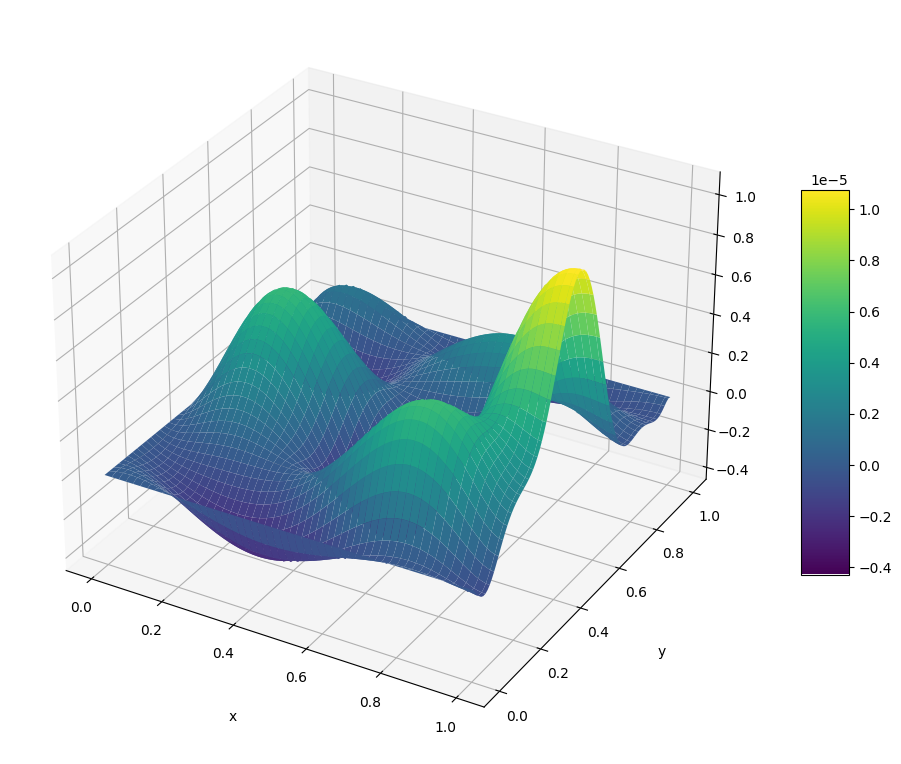

In [ ]:

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.linspace(0, 1, n_test)
y = np.linspace(0, 1, n_test)

X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, (y_true-y_predict).reshape(n_test,n_test), cmap = 'viridis')


# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()






In [ ]:
p = p7
weights = p[0:2*(len(p)//4)].reshape(2,len(p)//4)
biases = p[2*(len(p)//4):3*(len(p)//4)].reshape(1,len(p)//4)
nweights = p[3*(len(p)//4):4*(len(p)//4)].reshape(1,len(p)//4)
X = inputs.T
x = X[:,0]
x = x.reshape(len(x),1)
y = X[:,1]
y = y.reshape(len(y),1)


x1 = np.zeros(X.shape)
x1[:,0] = x.T
x1[:,1] = np.ones((1,len(y)))

inputs1 = x1.T

der_NN_xy_k_for_u(inputs, weights, nweights, biases, X, j=[0,1], k=[2,1])

array([[ 8.46605353e-02, -4.55183762e-02,  1.62072618e+00, ...,
         7.20694525e-03,  2.06109576e-05, -4.85852130e-04],
       [ 8.50150067e-02, -4.58258974e-02,  1.61956823e+00, ...,
         5.67351885e-03,  2.18844848e-05, -4.58155108e-04],
       [ 8.53669989e-02, -4.61322843e-02,  1.61816551e+00, ...,
         4.11756846e-03,  2.31440453e-05, -4.30903142e-04],
       ...,
       [ 9.61555247e-02, -3.49466674e-02,  3.56601022e-01, ...,
        -6.15804929e-01,  1.06737272e-04,  2.16857425e-04],
       [ 9.59650781e-02, -3.53205453e-02,  3.52362217e-01, ...,
        -6.14969570e-01,  1.07330167e-04,  2.31032875e-04],
       [ 9.57734219e-02, -3.56912939e-02,  3.48168372e-01, ...,
        -6.14111440e-01,  1.07922939e-04,  2.44903198e-04]])

In [ ]:
der_NN_xy_k_for_w(inputs, weights, nweights, biases, X, j=[0,1], k=[2,0], l=0)

array([[ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.80424057e-01,  2.66036472e-04, -4.14786089e-01, ...,
        -0.00000000e+00, -2.85165031e-01, -6.74297416e+00],
       [ 1.81236875e-01,  2.85130395e-04, -4.16234609e-01, ...,
        -0.00000000e+00, -2.47570060e-01, -6.74285041e+00],
       [ 1.82041350e-01,  3.05191761e-04, -4.17686584e-01, ...,
        -0.00000000e+00, -2.10180480e-01, -6.74245269e+00]])

In [ ]:
  j=[0,1]
  k=[2,0]

  temp1 = (weights[0]**k[0])*(weights[1]**k[1])
  lin_out = weights.T @ inputs + biases.T

  temp2 = ((nweights*temp1) * (sigmoid_for_k(lin_out,k+1).T) )

TypeError: can only concatenate list (not "int") to list

In [ ]:
  x1 = np.zeros(X.shape)
  x1[:,0] = x.T
  x1[:,1] = np.ones((1,len(y)))

  inputs1 = x1.T

In [ ]:
der_NN_xy_k_for_w(inputs, weights, nweights, biases,X, j=[0,1],k=[1,1],l=1)

array([[-0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.54882940e-03, -3.62459713e-06,  2.35262617e-03, ...,
        -1.33295041e-08,  3.58040909e-03,  3.83813392e-03],
       [-3.10566070e-03, -6.06999591e-06,  4.71216895e-03, ...,
        -2.66587001e-08,  7.06082661e-03,  7.69160439e-03],
       ...,
       [-1.32406047e-01, -2.11205130e-04,  1.13773426e-01, ...,
         0.00000000e+00, -5.89012025e-02, -1.25938714e+00],
       [-1.34373703e-01, -2.28697354e-04,  1.15347764e-01, ...,
         0.00000000e+00, -5.16630876e-02, -1.27234716e+00],
       [-1.36347407e-01, -2.47286011e-04,  1.16931262e-01, ...,
         0.00000000e+00, -4.43081619e-02, -1.28525448e+00]])

In [ ]:
der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=2,l=1).shape

In [ ]:
  N_0_w1    = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=0, l=1)
  N1_0_w1   = der_NN_xj_k_for_w(inputs1, weights, nweights, biases,X, j=0,k=0, l=1)
  N1_1_y_w1 = der_NN_xj_k_for_w(inputs1, weights, nweights, biases,X, j=1,k=1, l=1)
  N_1_y_w1  = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=1,k=1, l=1)
  N_2_y_w1  = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=1,k=2, l=1)
  N_1_x_w1  = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=1, l=1)
  N1_1_x_w1 = der_NN_xj_k_for_w(inputs1, weights, nweights, biases,X, j=0,k=1, l=1)
  N_2_x_w1  = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=2, l=1)
  N1_2_x_w1 = der_NN_xj_k_for_w(inputs1, weights, nweights, biases,X, j=0,k=2, l=1)
  N1_2_xy_w1= der_NN_xy_k_for_w(inputs1, weights, nweights, biases,X, j=[0,1],k=[1,1],l=1)
  N1_3_xy_w1= der_NN_xy_k_for_w(inputs1, weights, nweights, biases,X, j=[0,1],k=[2,1],l=1)

In [ ]:
  # Dw0_cap_N     = N_0_w0 - N1_0_w0 - N1_1_y_w0
  # Dw0_Dx_cap_N     = N_1_x_w0 - N1_1_x_w0 - N1_2_xy_w0
  # Dw0_D2x_cap_N    = N_2_x_w0 - N1_2_x_w0 - N1_3_xy_w0


  Dw1_cap_N     = N_0_w1 - N1_0_w1 - N1_1_y_w1
  Dw1_Dx_cap_N     = N_1_x_w1 - N1_1_x_w1 - N1_2_xy_w1
  Dw1_D2x_cap_N    = N_2_x_w1 - N1_2_x_w1 - N1_3_xy_w1

In [ ]:
der_NN_xy_k_for_w(inputs1, weights, nweights, biases,X, j=[0,1],k=[1,1],l=1)

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
import sys
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
!pip uninstall fenics

Found existing installation: fenics 2019.1.0
Uninstalling fenics-2019.1.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/fenics-2019.1.0.dist-info/*
Proceed (Y/n)? y
  Successfully uninstalled fenics-2019.1.0


In [ ]:
!pip install --user fenics
import fenics

  Using cached fenics-2019.1.0-py3-none-any.whl (1.5 kB)


ModuleNotFoundError: No module named 'fenics'

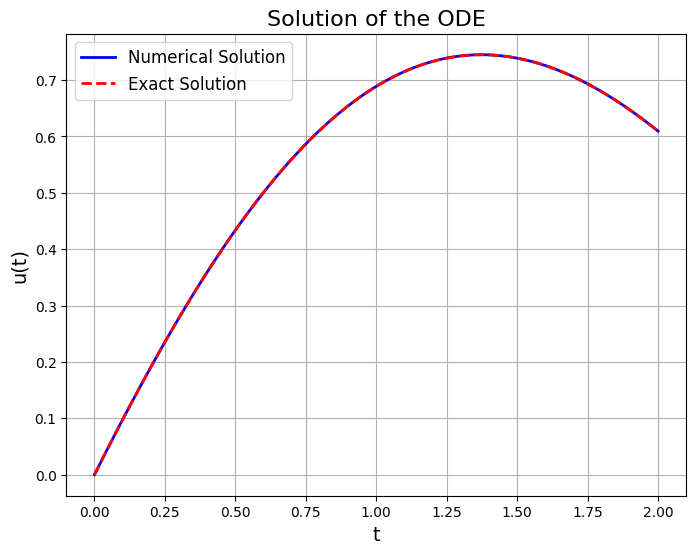

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

# Define the ODE function
def ode_func(t, y):
    dydt = np.zeros_like(y)
    dydt[0] = y[1]
    dydt[1] = -y[0] - y[1] / 5 - 1/5 * np.exp(-t/5) * np.cos(t)
    return dydt

# Initial conditions
y0 = [0, 1]  # u(0) = 0, u'(0) = 1
t0 = 0
t_span = [0, 2]  # Solve over the interval [0, 2]

# Solve the ODE
sol = solve_ivp(ode_func, t_span, y0, method='Radau', atol=1e-4, rtol=1e-4, dense_output=True)

# Extract the solution
t = np.linspace(t_span[0], t_span[1], 1001)
y = sol.sol(t)

# Plot the solution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(t, y[0], 'b', linewidth=2, label='Numerical Solution')
plt.plot(t, np.exp(-t/5) * np.sin(t), 'r--', linewidth=2, label='Exact Solution')
plt.xlabel('t', fontsize=14)
plt.ylabel('u(t)', fontsize=14)
plt.title('Solution of the ODE', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

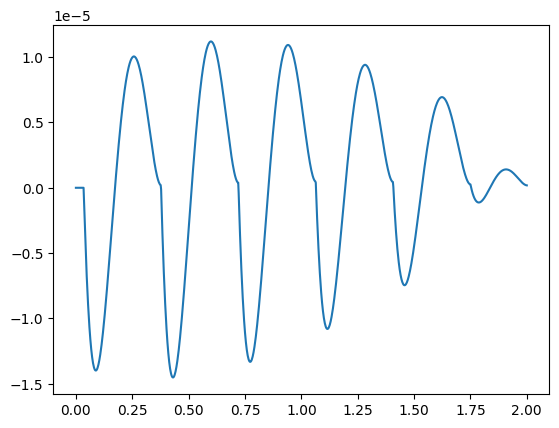

In [2]:
plt.plot(t, np.exp(-t/5) * np.sin(t) - y[0])

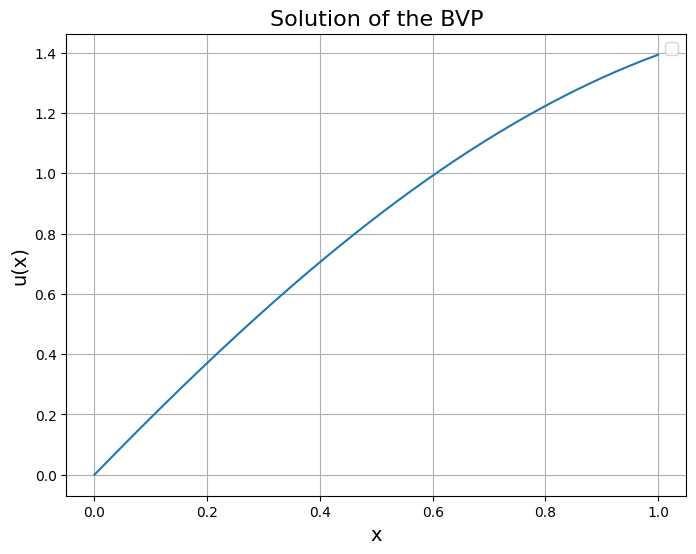

In [19]:
import numpy as np
from scipy.integrate import solve_bvp

# Define the ODE function
def ode_func(x, y):
    dydt = np.zeros_like(y)
    dydt[0] = y[1]
    dydt[1] = -y[0]  - (y[1] / 5) -( 1/5) * np.exp(-x/5) * np.cos(x)
    return dydt

# Define the boundary conditions
def bc(ya, yb):
    return np.array([ya[0], yb[1] - np.sin(1) * np.exp(-1/5)])

# Solve on a coarse grid first
x_coarse = np.linspace(0, 1, 501)
y_guess_coarse = np.zeros((2, x_coarse.size))
sol_coarse = solve_bvp(ode_func, bc, x_coarse, y_guess_coarse)

# Use the coarse solution as the initial guess for the fine grid
x_fine = np.linspace(0, 1, 1001)
y_guess_fine = sol_coarse.sol(x_fine)
sol_fine = solve_bvp(ode_func, bc, x_fine, y_guess_fine, max_nodes=10000, tol=1e-10)

# Extract the solution
y = sol_fine.sol(x_fine)
# y = sol_coarse.sol(x_fine)

# Plot the solution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(x_fine, (y[0]))
plt.xlabel('x', fontsize=14)
plt.ylabel('u(x)', fontsize=14)
plt.title('Solution of the BVP', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

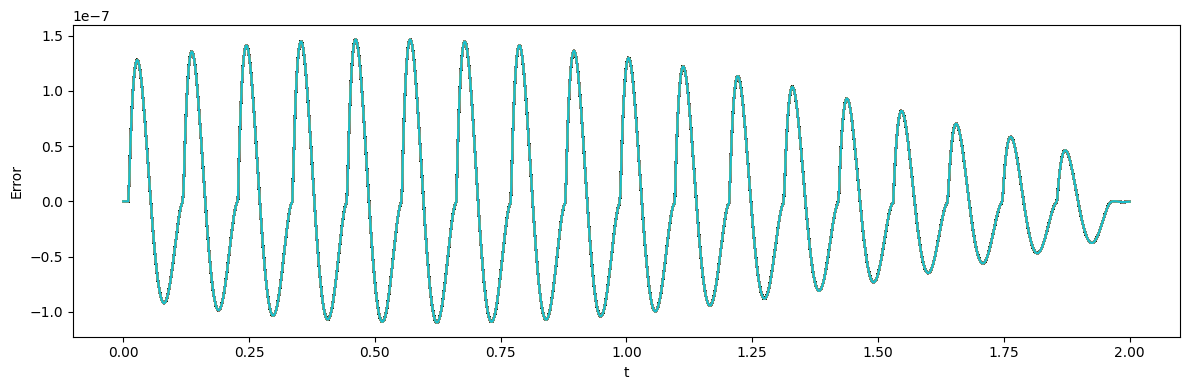

Mean time taken: 0.006335 seconds
Standard deviation: 0.001540 seconds


In [9]:

from scipy.integrate import solve_ivp
import time
import numpy as np
import matplotlib.pyplot as plt

    # Define the ODE function
def ode_func(t, y):
    dydt = np.zeros_like(y)
    dydt[0] = y[1]
    dydt[1] = -y[0] - y[1] / 5 - 1/5 * np.exp(-t/5) * np.cos(t)
    return dydt

    # Initial conditions
y0 = [0, 1]  # u(0) = 0, u'(0) = 1
t0 = 0
t_span = [0, 2]  # Solve over the interval [0, 2]

# Number of iterations to perform
num_iterations = 1000

# Arrays to store elapsed times and solutions
elapsed_times = np.zeros(num_iterations)
solutions = []

# Perform multiple iterations to measure time and store solutions
for i in range(num_iterations):
    start_time = time.time()

    # Solve the ODE
    sol = solve_ivp(ode_func, t_span, y0, method='Radau', atol=1e-6, rtol=1e-6, dense_output=True)

    # Extract the solution
    t = np.linspace(t_span[0], t_span[1], 1001)
    y = sol.sol(t)

    end_time = time.time()
    elapsed_time = end_time - start_time

    elapsed_times[i] = elapsed_time
    solutions.append(y[0])

# Plot the errors
plt.figure(figsize=(12, 4))
for i, solution in enumerate(solutions):
    plt.plot(t, solution - (np.exp(-t/5) * np.sin(t)))

plt.xlabel('t')
plt.ylabel('Error')
# plt.legend()
plt.tight_layout()
plt.show()

# Print the mean and standard deviation of the elapsed times
print(f"Mean time taken: {np.mean(elapsed_times):.6f} seconds")
print(f"Standard deviation: {np.std(elapsed_times):.6f} seconds")


Text(0, 0.5, 'Error')

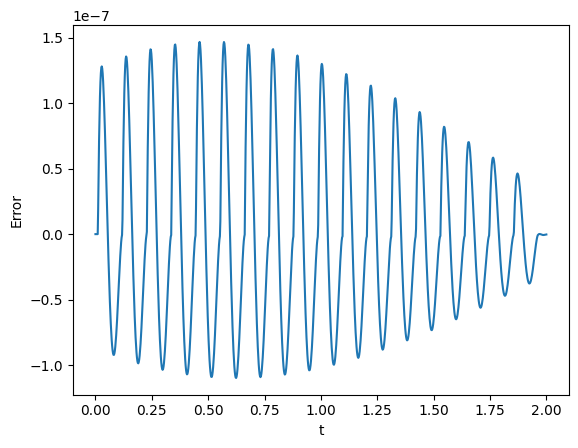

In [7]:
plt.plot(t, solution - (np.exp(-t/5) * np.sin(t)))

plt.xlabel('t')
plt.ylabel('Error')

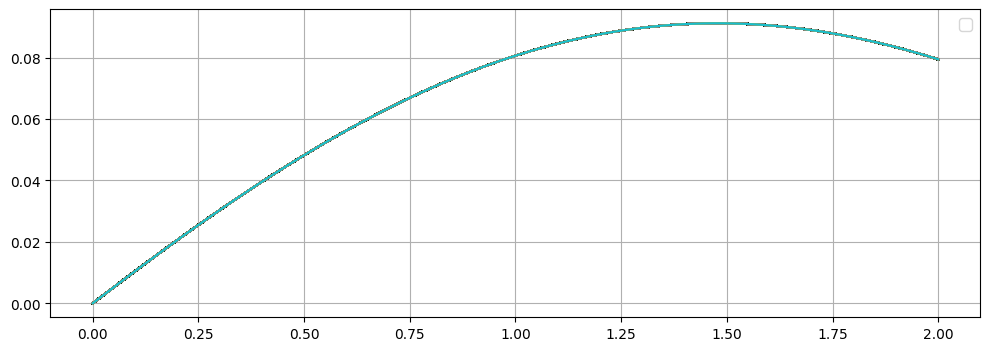

In [ ]:
import numpy as np
from scipy.integrate import solve_bvp

# Define the ODE function
def ode_func(x, y):
    dydt = np.zeros_like(y)
    dydt[0] = y[1]
    dydt[1] = -y[0]  - y[1] / 5 - 1/5 * np.exp(-x/5) * np.cos(x)
    return dydt

# Define the boundary conditions
def bc(ya, yb):
    return np.array([ya[0], yb[0] - np.sin(1) * np.exp(-1/5)])


# Number of iterations to perform
num_iterations = 1000

# Arrays to store elapsed times and solutions
elapsed_times = np.zeros(num_iterations)
solutions = []

# Perform multiple iterations to measure time and store solutions
for i in range(num_iterations):
    start_time = time.time()

    # Solve on a coarse grid first
    x_coarse = np.linspace(0, 2, 101)
    y_guess_coarse = np.zeros((2, x_coarse.size))
    sol_coarse = solve_bvp(ode_func, bc, x_coarse, y_guess_coarse)

    # Use the coarse solution as the initial guess for the fine grid
    x_fine = np.linspace(0, 2, 501)
    y_guess_fine = sol_coarse.sol(x_fine)
    sol_fine = solve_bvp(ode_func, bc, x_fine, y_guess_fine, max_nodes=10000, tol=1e-10)

    # Extract the solution
    y = sol_fine.sol(x_fine)

    end_time = time.time()
    elapsed_time = end_time - start_time

    elapsed_times[i] = elapsed_time
    solutions.append(y[0])

# Plot the errors
plt.figure(figsize=(12, 4))
for i, solution in enumerate(solutions):
    plt.plot(x_fine, solution - (np.exp(-x_fine/5) * np.sin(x_fine)))


# Plot the solution
plt.legend(fontsize=12)
plt.grid()
plt.show()

Text(0, 0.5, 'Error')

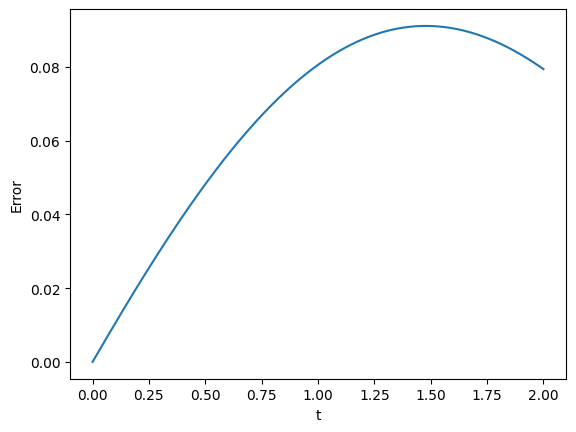

In [ ]:
plt.plot(x_fine, solution - (np.exp(-x_fine/5) * np.sin(x_fine)))
plt.xlabel('t')
plt.ylabel('Error')

In [ ]:
# Print the mean and standard deviation of the elapsed times
print(f"Mean time taken: {np.mean(elapsed_times):.6f} seconds")
print(f"Standard deviation: {np.std(elapsed_times):.6f} seconds")

Mean time taken: 0.014992 seconds
Standard deviation: 0.013378 seconds


In [ ]:
!pip install wandb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
import wandb
wandb.login(key='da5365b4335ad8c7a1df7f3653ec9d0b092e8b09')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
!wandb agent shubham821/ANN_Proj_Ques_5_new_2/tzd86lkm

wandb: Starting wandb agent 🕵️
2024-03-13 21:13:36,567 - wandb.wandb_agent - INFO - Running runs: []
2024-03-13 21:13:38,732 - wandb.wandb_agent - INFO - Agent received command: run
2024-03-13 21:13:38,732 - wandb.wandb_agent - INFO - Agent starting run with config:
	hiddenUnits: 96
	trainingPoints: 17
2024-03-13 21:13:38,733 - wandb.wandb_agent - INFO - About to run command: /usr/bin/env python train.py --hiddenUnits=96 --trainingPoints=17
python3: can't open file '/content/train.py': [Errno 2] No such file or directory
2024-03-13 21:13:43,744 - wandb.wandb_agent - INFO - Running runs: ['acp0x484']
2024-03-13 21:13:43,745 - wandb.wandb_agent - INFO - Cleaning up finished run: acp0x484
2024-03-13 21:13:44,158 - wandb.wandb_agent - INFO - Agent received command: run
2024-03-13 21:13:44,158 - wandb.wandb_agent - INFO - Agent starting run with config:
	hiddenUnits: 72
	trainingPoints: 32
2024-03-13 21:13:44,159 - wandb.wandb_agent - INFO - About to run command: /usr/bin/env python train.p